Atividades

In [2]:
#Importando bibliotecas utilizadas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Atividade - Visualização de Dados**

Definição do escopo da visualização de dados

1. Problema: Falta de monitoramento e transparencia dos custos com parlamentares;

2. Objetivo: Desenvolver um dashboard de monitoramento de custos;

3. Fonte de dados: http://www.camara.leg.br/cotas/Ano-XXXX.csv.zip

4. Frequência: Atualização diária


In [11]:
ano_corrente = 2022 + 1   #Ano inicial da base de dados
inicio = ano_corrente - 4    #Ano final da base de dados

anos = [*range(inicio, ano_corrente, 1)]
consolidated_df = []

for ano in anos:
    df = pd.read_csv("http://www.camara.leg.br/cotas/Ano-"+ str(ano) +".csv.zip", sep=";")
    consolidated_df.append(df)

consolidated_df = pd.concat(consolidated_df)
consolidated_df.head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LID.GOV-CD,NaN,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1554246,NaN,NaN,2812,6738121,https://www.camara.leg.br/cota-parlamentar/not...
1,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570078,NaN,NaN,2812,6769606,https://www.camara.leg.br/cota-parlamentar/not...
2,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570503,NaN,NaN,2812,6771099,https://www.camara.leg.br/cota-parlamentar/not...
3,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1579375,NaN,NaN,2812,6793690,https://www.camara.leg.br/cota-parlamentar/not...
4,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1590980,NaN,NaN,2812,6821674,https://www.camara.leg.br/cota-parlamentar/not...


**Análise Exploratória de Dados**

In [12]:
consolidated_df["numAno"].unique()

array([2019, 2020, 2021, 2022], dtype=int64)

In [13]:
consolidated_df.shape #Formato do dataframe (linhas, colunas)

(781981, 31)

In [14]:
consolidated_df.info() #Colunas do dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781981 entries, 0 to 113666
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          781981 non-null  object 
 1   cpf                        779315 non-null  float64
 2   ideCadastro                779414 non-null  float64
 3   nuCarteiraParlamentar      779414 non-null  float64
 4   nuLegislatura              781981 non-null  int64  
 5   sgUF                       779414 non-null  object 
 6   sgPartido                  779414 non-null  object 
 7   codLegislatura             781981 non-null  int64  
 8   numSubCota                 781981 non-null  int64  
 9   txtDescricao               781981 non-null  object 
 10  numEspecificacaoSubCota    781981 non-null  int64  
 11  txtDescricaoEspecificacao  192574 non-null  object 
 12  txtFornecedor              781948 non-null  object 
 13  txtCNPJCPF                 70

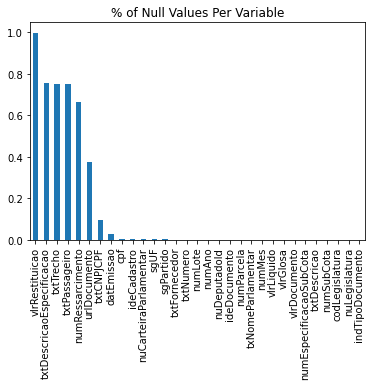

In [15]:
#check for null values


(
    consolidated_df
    .isnull()
    .sum()
    .sort_values(ascending=False)
    / consolidated_df.shape[0]
).plot(kind="bar")

plt.title("% of Null Values Per Variable")

plt.show()


**Dashboard**

In [22]:
ano_corrente_df = consolidated_df[consolidated_df["numAno"] == (ano_corrente - 1)]

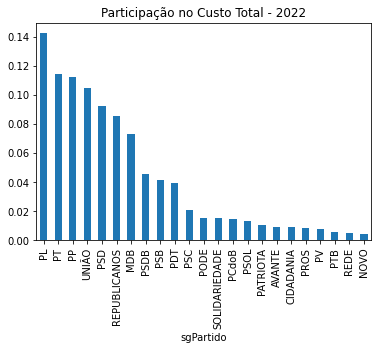

In [29]:
(
    ano_corrente_df
    .groupby("sgPartido")["vlrDocumento"]
    .sum()
    .sort_values(ascending=False)
    / ano_corrente_df["vlrDocumento"].sum()
).plot(kind="bar")

plt.title("Participação no Custo Total - " + str(ano_corrente - 1))

plt.show()

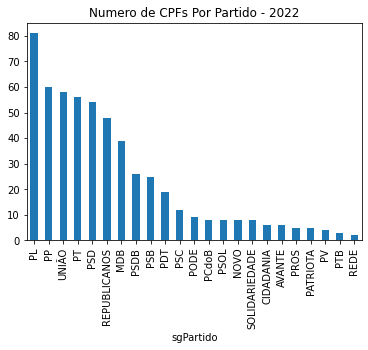

In [30]:
(
    ano_corrente_df[ano_corrente_df["cpf"].notnull()]
    .groupby("sgPartido")["cpf"]
    .nunique()
    .sort_values(ascending=False)

).plot(kind="bar")

plt.title("Numero de CPFs Por Partido - " + str(ano_corrente - 1))

plt.show()

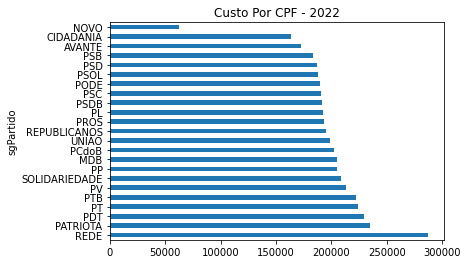

In [32]:
(
    ano_corrente_df
    .groupby("sgPartido")["vlrDocumento"]
    .sum()
    /
    ano_corrente_df
    .groupby("sgPartido")["cpf"]
    .nunique()
    
).sort_values(ascending=False).plot(kind="barh")

plt.title("Custo Por CPF - " + str(ano_corrente - 1))

plt.show()